# Spotify top 50 Tracks Analysis
By: Kasparas Rutkauskas

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import datetime as dt
import regex as re
import matplotlib as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

## Executive Summary
*   We look into the Top 50 Spotify Tracks to get an understanding for what makes a song popular at least using the 2020 data.
*   The artists that had the most amount tracks in the top 50 were: `Dua Lipa`, `Travis Scott`, `Billie Eilish` with `Dua Lipa` representing more pop-based songs on her album `Future Nostalgia`, `Travis Scott` producing highly-danceable `Trap` songs with hit albums `ASTROWORLD`, `Birds In The Trap Sing McKnight` & the single `HIGHEST IN THE ROOM` & `Billie Eilish` showing up with 2 singles & 1 album track in more unique, less-known genres like Chamber-Pop & Electro-Pop.
*   There are 16 unique genres define, with 12 main genres & 10 secondary genres in the top 50 track list. The most popular genres are `Pop`, `Hip-Hop` & `Rap`, which all have more than 12 songs in the top 50, far exceeding the other genres in terms of number of songs in the top 50. However,  `R&B` & `Soul` seem to be genres that have very high average positions in the top 50 compared to other genres. This may be an indication of a possible unmet demand for genres within the `R&B` style of music that could be (and maybe should be) pushed to more people than other types of music?
*   In the top 50 track list, 15 songs are singles & the rest 35 are from albums. Although there are no significant differences between average positions of the two types of song releases. 
*   The most popular albums in the top 50 Spotify track list of 2020 are: `Dua Lipa's Future Nostalgia`, `Justin Bieber's Changes`, `Post Malone's Hollywood's Bleeding` & `Harry Style's Fine Line`. Most of these albums are `Pop` based and not surprising to end up in the top albums of 2020.
*   Artists might find success not only on their own solo songs, but on featuring in others' songs too - in 2020,  artists found that type of success: Ariana Grande (on `Rain On Me` with `Lady Gaga`) & `Juice WRLD` (on `Godzilla` with `Eminem`). However, there are artists that are better off doing solo projects - e.g. Justin Bieber (on `Stuck with U` from `Ariana Grande`) & Drake (on `Life Is Good` from `Future`). There are also artists that only appeared as features on the top 50 tracks, e.g. `Quavo` on `Intentions` with `Justin Bieber`. And `Roddy Ricch` was successful as both a feature and a solo artist. 
*   We find there are 3 strong correlations of note: 
    *   `loudness` - `energy` (*0.79164*)
    *   `energy` - `acousticness` (*-0.682479*)
    *   `instrumentalness` - `loudness` (*-0.553735*)
*   We tap into per genre analysis for the entire list of features in the dataset [here](#per_genre_observations).
*   We find that the Top 50 Spotify track list, has mostly songs that have a high `danceability`, `valence` & `energy` scores and are around 3-4 minutes long.

Let's get the data from here: https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020

In [4]:
spotify_data = pd.read_csv('spotifytoptracks.csv', index_col=0)\
                 .rename_axis('Position', axis = 'rows')
spotify_data.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
Position,,,,,,,,,,,,,,,,
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Data Cleaning

Before we start analysing, let's do some data review/cleaning.
Searching for `Null` values: 

In [276]:
spotify_data.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

*There are no null values in any of the columns, which means we don't need any missing data cleaning*

Next, since this dataset is on a track-level basis, need to check if each track_id and track_name are unique 

In [6]:
print(f"""Number of tracks that do not have unique track_ids: {sum(spotify_data['track_id']
                                                                 .value_counts() > 1)}""")
print(f"""Number of tracks that do not have unique track_names: {sum(spotify_data['track_name']
                                                                   .value_counts() > 1)}""")
sum(spotify_data['track_id'].duplicated()) 

# Comments:
# Categorical variables can be the same (but written differently) - not the best 

Number of tracks that do not have unique track_ids: 0
Number of tracks that do not have unique track_names: 0


0

*All rows have unique track names and track_ids - no duplicate removal needed*

Now let's look at the data types of the data columns and check if they make sense: 

In [278]:
spotify_data.dtypes

artist               object
album                object
track_name           object
track_id             object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

*All data types seem to make sense*

And do we have all 50 spotify tracks? Additionally, how many features do we have in the table? What about categorical variables?

In [279]:
print(f"Number of tracks: {spotify_data.shape[0]}")
print(f"""Number of numeric features: {spotify_data[['energy',
                                       'danceability',
                                       'loudness',
                                       'acousticness',
                                       'speechiness',
                                       'instrumentalness',
                                       'liveness',
                                       'valence',
                                       'tempo',
                                       'duration_ms']].shape[1]}""")
print(f"Number of categorical features: {spotify_data[['genre']].shape[1]}")

Number of tracks: 50
Number of numeric features: 10
Number of categorical features: 1


*We have all 50 tracks - that's good, we have no missing rows. We also have 10 numeric features representing ordinal variables indicating features of each track. We additionally have 1 categorical feature - genre.*

Let's also check out the genre unique values - see if they have no issues

In [280]:
spotify_data.genre.unique()

array(['R&B/Soul', 'Alternative/Indie', 'Hip-Hop/Rap', 'Dance/Electronic',
       'Nu-disco', 'Pop', 'R&B/Hip-Hop alternative', 'Pop/Soft Rock',
       'Pop rap', ' Electro-pop', 'Hip-Hop/Trap', 'Dance-pop/Disco',
       'Disco-pop', 'Dreampop/Hip-Hop/R&B',
       'Alternative/reggaeton/experimental', 'Chamber pop'], dtype=object)

*As we can see, the Electro-pop value has some un-needed whitespace at the start of the string. Let's fix that*

In [281]:
spotify_data['genre'] = spotify_data['genre'].str.strip()
spotify_data.genre.unique()

array(['R&B/Soul', 'Alternative/Indie', 'Hip-Hop/Rap', 'Dance/Electronic',
       'Nu-disco', 'Pop', 'R&B/Hip-Hop alternative', 'Pop/Soft Rock',
       'Pop rap', 'Electro-pop', 'Hip-Hop/Trap', 'Dance-pop/Disco',
       'Disco-pop', 'Dreampop/Hip-Hop/R&B',
       'Alternative/reggaeton/experimental', 'Chamber pop'], dtype=object)

*Great, It worked! With current data Validation & Preparation done, we can move to feature engineering from the current data we have.*

## Feature Engineering

Firstly, I will assume that the initial download of the Spotify tracks has the tracks listed in the position that they ended up at the end of the year in the charts

In [282]:
spotify_data['position'] = spotify_data.index + 1

Secondly, let's assume that the genres are listed in the order of the which genre describes the song the best. Let's split these out into separate columns

In [283]:
split_genres = spotify_data.genre.str.split('/')
spotify_data['main_genre'] = [g[0] for g in split_genres]
spotify_data['second_genre'] = [g[1] if len(g) > 1 else None for g in split_genres]
spotify_data['third_genre'] = [g[2] if len(g) == 3 else None for g in split_genres]

print('Most popular genres based on main_genre\n', spotify_data.groupby('main_genre')
                                                    .agg({'position' : ['mean', 'count']})
                                                    .sort_values(by = ('position','count'),
                                                                 ascending = False))

print('\nMost popular genres based on secondary_genre\n', spotify_data.groupby('second_genre')
                                                    .agg({'position' : ['mean', 'count']})
                                                    .sort_values(by = ('position','count'),
                                                                 ascending = False))

print('\nMost popular genres based on third_genre\n', spotify_data.groupby('third_genre')
                                                    .agg({'position' : ['mean', 'count']})
                                                    .sort_values(by = ('position','count'),
                                                                 ascending = False))

Most popular genres based on main_genre
               position      
                  mean count
main_genre                  
Pop          28.466667    15
Hip-Hop      23.500000    14
Alternative  21.400000     5
Dance        30.200000     5
R&B           9.333333     3
Electro-pop  28.000000     2
Chamber pop  45.000000     1
Dance-pop    32.000000     1
Disco-pop    33.000000     1
Dreampop     38.000000     1
Nu-disco      5.000000     1
Pop rap      24.000000     1

Most popular genres based on secondary_genre
                       position      
                          mean count
second_genre                        
Rap                  23.153846    13
Electronic           30.200000     5
Indie                15.750000     4
Soul                  9.500000     2
Disco                32.000000     1
Hip-Hop              38.000000     1
Hip-Hop alternative   9.000000     1
Soft Rock            13.000000     1
Trap                 28.000000     1
reggaeton            44.000000   

*The most popular main genres are Pop & Hip-Hop by far, although Hip-Hop songs have the higher average position, by almost 5 positions. Noteworthy is the fact that all 3 R&B tracks have a very high average position.*

*The most popular secondary genre is Rap with an average position of 22.154. Lastly, there are only 2 songs that have third genres, which are relatively low placed ending up at 38 & 44.*

Lastly, it would be interesting to see which genres mesh well, and which - don't. Let's figure out which main & secondary genres are the most popular.

In [284]:
spotify_data[spotify_data.genre.str.count('/') != 0]\
    .groupby('genre').track_id\
    .count()\
    .sort_values(ascending=False)

genre
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
Alternative/reggaeton/experimental     1
Dance-pop/Disco                        1
Dreampop/Hip-Hop/R&B                   1
Hip-Hop/Trap                           1
Pop/Soft Rock                          1
R&B/Hip-Hop alternative                1
Name: track_id, dtype: int64

*The Hip-Hop Rap combination seems to be the most popular genre merge in the Spotify top 50 track list*

Additionally, if you notice, some songs have the same name as their albums - these songs are albums by themselves, so called singles. 

In [285]:
spotify_data['album_type'] = np.where(spotify_data.track_name == spotify_data.album,
                                      'Single', 'Multi-Song Album')
spotify_data.groupby('album_type').agg({'position' : ['mean', 'count']})

position      
                       mean count
album_type                       
Multi-Song Album  25.771429    35
Single            24.866667    15

*Interestingly, singles have no apparent higher popularity compared to songs from Multi-Song albums, rejecting the hypothesis that songs that are released in an album should have lower popularity values due to their attention being split by multiple songs by the artist released at the same time* 

Also some songs have features in them, which is indicated in the title of the song - let's extract the feature artist as well. 

In [286]:
spotify_data['feature'] = spotify_data['track_name'].str.extract('(?:feat\. |\(with )([^)]*)')

pd.concat([spotify_data.feature.value_counts().rename('feature_count'),
                           spotify_data[spotify_data.artist.isin(set(spotify_data.feature))]
                           .artist
                           .value_counts()
                           .rename('solo_song_count')], axis = 1)\
                           .fillna(0)


,feature_count,solo_song_count
Roddy Ricch,1,1.0
Quavo,1,0.0
Drake,1,1.0
iann dior,1,0.0
Megan Thee Stallion,1,0.0
Juice WRLD,1,1.0
Gus Dapperton,1,0.0
Emilee,1,0.0
Ariana Grande,1,1.0
Khalid,1,0.0


*Interesting, notice that these featuring artists also have songs that they made themselves in the top 50 Spotify tracklist*

Let's check out whether these featuring artists performed better when they were collabing in others songs or releasing their own music.

In [287]:
feature_tracks = spotify_data[spotify_data.feature.notnull()][['feature', 'position']]
feature_artist_solo_tracks = spotify_data[spotify_data.artist
                                             .isin(set(spotify_data.feature))][['artist',
                                                                                'position']]

pd.merge(feature_tracks, feature_artist_solo_tracks, 
         how = 'outer', 
         left_on = 'feature', right_on = 'artist')\
            .drop('artist', axis = 1)\
            .rename(columns={'feature' : 'feature/artist',
                             'position_x' : 'position_collab',
                             'position_y' :'position_solo'})


,feature/artist,position_collab,position_solo
0,Roddy Ricch,6,3.0
1,Quavo,15,NaN
2,Drake,20,16.0
3,iann dior,24,NaN
4,Megan Thee Stallion,28,NaN
5,Juice WRLD,30,46.0
6,Gus Dapperton,34,NaN
7,Emilee,35,NaN
8,Ariana Grande,36,47.0
9,Khalid,45,NaN


*From this analysis, only a handful of artists appeared in the top 50 Spotify list as solo artists & collab artists. Out of these artists, only Ariana Grande's, Juice WRLDs appearances performed better than their own solo songs in the year 2020.*

*There's also 2 artists that performed better on their solos, rather than their collabs - Roddy Ricch & Justin Bieber. Looking at Roddy's song positions, it is clear that 2020 was a very good year for him*

*The other artists most likely did not release their own music around 2020, or are more niche artists, that were invited to feature because of their unique and not as popular music style.*


Let's also transform the `duration_ms` value to make it more understandable - format it into minutes

In [288]:
spotify_data['duration_minutes'] = round(spotify_data.duration_ms / 60000, 2)
del spotify_data['duration_ms']
spotify_data.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,genre,position,main_genre,second_genre,third_genre,album_type,feature,duration_minutes
Position,,,,,,,,,,,,,,,,,,,,,,
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,R&B/Soul,1,R&B,Soul,None,Multi-Song Album,NaN,3.33
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,Alternative/Indie,2,Alternative,Indie,None,Single,NaN,3.50
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,Hip-Hop/Rap,3,Hip-Hop,Rap,None,Multi-Song Album,NaN,3.28
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,Dance/Electronic,4,Dance,Electronic,None,Multi-Song Album,NaN,2.94
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,Nu-disco,5,Nu-disco,None,None,Multi-Song Album,NaN,3.05


With all the features created, let's sort the columns for readability's sake

In [289]:
columns = spotify_data.columns.tolist()

columns.remove('feature')
columns.insert(3, 'feature')
columns.remove('duration_minutes')
columns.insert(15, 'duration_minutes')
columns.remove('album_type')
columns.insert(2, 'album_type')
spotify_data = spotify_data[columns]

With Feature Engineering done, let's review the number of `Null` values in the `spotify_data` table


In [290]:
spotify_data.isnull().sum()

artist               0
album                0
album_type           0
track_name           0
feature             38
track_id             0
energy               0
danceability         0
key                  0
loudness             0
acousticness         0
speechiness          0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_minutes     0
genre                0
position             0
main_genre           0
second_genre        20
third_genre         48
dtype: int64

*The fact that `features`, `second_genre`, `third_genre` have 38, 20, 48 Null values respectively is expected, since not all tracks have feature artists and don't represent multiple genres.*

## Foundational Feature Analysis

Now, let's first define what is `popularity` of an artist within the context of this table. I will analyze two tiers of "popularity" - one is with the understanding that all songs in this list are popular and thus the entire dataset should be analyzed to get an understanding of what makes a song popular in general; the second tier of analysis is regarding within the dataset tracks - understanding that the songs are the most popular at the top and the least popular at the bottom - in that way allowing for what makes a song "the most popular among the popular songs". In the latter case, the position of the track & the amount of songs the artist has in the top 50 are going to be main variables indicating success of a track.


In [291]:
spotify_data.describe() 

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_minutes,position
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,3.333400,25.50000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,0.566019,14.57738
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,2.340000,1.00000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,2.932500,13.25000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,3.300000,25.50000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,3.587500,37.75000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,5.210000,50.00000


Let's look into how many unique artists and albums do we have in the dataset? 

In [292]:
print(f"Number of unique artists in the dataset: {spotify_data.artist.nunique()}")
print(f"Number of unique albums in the dataset: {spotify_data.album.nunique()}")

Number of unique artists in the dataset: 40
Number of unique albums in the dataset: 45


Now, which artists out of these had the most amount of songs in the top 50 and what were their genres?

In [293]:
multiple_track_artists = spotify_data.artist.value_counts()[spotify_data.artist.value_counts()>1]
most_frequent_artists = multiple_track_artists.index
most_frequent_artists_nr_songs = multiple_track_artists.values

identifying_columns = ['artist', 'album', 'track_name', 'feature', 'main_genre']

most_frequent_artists_songs = spotify_data[spotify_data.artist.isin([*most_frequent_artists])][identifying_columns]
most_frequent_artists_songs

,artist,album,track_name,feature,main_genre
Position,,,,,
4,Dua Lipa,Future Nostalgia,Don't Start Now,NaN,Nu-disco
6,Harry Styles,Fine Line,Watermelon Sugar,NaN,Pop
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,NaN,Alternative
12,Post Malone,Hollywood's Bleeding,Circles,NaN,Pop
14,Justin Bieber,Changes,Intentions (feat. Quavo),Quavo,Pop
16,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,Before You Go,NaN,Alternative
21,Harry Styles,Fine Line,Adore You,NaN,Pop
24,Billie Eilish,everything i wanted,everything i wanted,NaN,Pop
26,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,NaN,Electro-pop


*Most artists are in the Pop-genre, which makes sense as Pop songs are designed to be the most popular. This was a big year for Travis Scott, Dua Lipa & Billie Eilish*

In a similar fashion, we should expect that the albums that are most frequent in the year, should be by these top artists of 2020.

In [294]:
multiple_track_albums = spotify_data.album.value_counts()[spotify_data.album.value_counts()>1]
most_frequent_albums = multiple_track_albums.index
most_frequent_albums_nr_songs = multiple_track_albums.values


most_frequent_album_songs = spotify_data[spotify_data.album.isin([*most_frequent_albums])]\
    [identifying_columns].sort_values(by ='Position')
most_frequent_album_songs

,artist,album,track_name,feature,main_genre
Position,,,,,
4,Dua Lipa,Future Nostalgia,Don't Start Now,NaN,Nu-disco
6,Harry Styles,Fine Line,Watermelon Sugar,NaN,Pop
12,Post Malone,Hollywood's Bleeding,Circles,NaN,Pop
14,Justin Bieber,Changes,Intentions (feat. Quavo),Quavo,Pop
21,Harry Styles,Fine Line,Adore You,NaN,Pop
30,Justin Bieber,Changes,Yummy,NaN,Pop
31,Dua Lipa,Future Nostalgia,Break My Heart,NaN,Dance-pop
37,Post Malone,Hollywood's Bleeding,Sunflower - Spider-Man: Into the Spider-Verse,NaN,Dreampop
48,Dua Lipa,Future Nostalgia,Physical,NaN,Dance


*The most popular albums are **Future Nostalgia** followed by **Fine Line, Holloywood's Bleeding & Changes***

Knowing the most popular artists & albums, let's look into what are the best artists/albums by average position? 

In [295]:
print('Top 10 Artists by position of their track in 2020')
spotify_data.groupby(['artist', 'genre'])\
            .agg({'position' : ['mean', 'count']})\
            .sort_values(by = [('position', 'mean'), ('position', 'count')],
                         ascending = [True, False])\
            .iloc[:10]

Top 10 Artists by position of their track in 2020


position      
                                           mean count
artist         genre                                 
The Weeknd     R&B/Soul                     1.0     1
Tones And I    Alternative/Indie            2.0     1
Roddy Ricch    Hip-Hop/Rap                  3.0     1
SAINt JHN      Dance/Electronic             4.0     1
Dua Lipa       Nu-disco                     5.0     1
DaBaby         Hip-Hop/Rap                  6.0     1
Powfu          Hip-Hop/Rap                  8.0     1
Trevor Daniel  R&B/Hip-Hop alternative      9.0     1
KAROL G        Pop                         11.0     1
Arizona Zervas Hip-Hop/Rap                 12.0     1

What about the genres that are most popular from these artists? 

In [296]:
print(f"Number of unique genres in the dataset: {spotify_data.genre.nunique()}")
print(f"Number of unique main genres in the dataset: {spotify_data.main_genre.nunique()}")
print(f"Number of unique secondary genres in the dataset: {spotify_data.second_genre.nunique()}")

Number of unique genres in the dataset: 16
Number of unique main genres in the dataset: 12
Number of unique secondary genres in the dataset: 10


Since we already know what the most popular genres are, let's find out which genres have only one song in the top 50: 

In [297]:
category_counts = spotify_data.groupby('main_genre').track_id.count()
min_categories = [*category_counts[category_counts == 1].index]
spotify_data[spotify_data.main_genre.isin(min_categories)][['artist',
                                                            'album',
                                                            'album_type',
                                                            'track_name',
                                                            'genre']]

,artist,album,album_type,track_name,genre
Position,,,,,
4,Dua Lipa,Future Nostalgia,Multi-Song Album,Don't Start Now,Nu-disco
23,24kGoldn,Mood (feat. iann dior),Single,Mood (feat. iann dior),Pop rap
31,Dua Lipa,Future Nostalgia,Multi-Song Album,Break My Heart,Dance-pop/Disco
32,BTS,Dynamite (DayTime Version),Multi-Song Album,Dynamite,Disco-pop
37,Post Malone,Hollywood's Bleeding,Multi-Song Album,Sunflower - Spider-Man: Into the Spider-Verse,Dreampop/Hip-Hop/R&B
44,Billie Eilish,lovely (with Khalid),Single,lovely (with Khalid),Chamber pop


*These tracks are interesting, since they don't represent typically popular genres that made it big in 2020 - maybe something to look out for in the future years?*

What about looking into the features of these tracks? Let's do a quick overview of the tracks we can expect to have high and low key metrics? 

E.g.: Which tracks are the most & least `danceable`?

In [298]:
print(f"""The most danceable track:\n
      {spotify_data.loc[spotify_data.danceability.idxmax(), ['artist',
                                                             'track_name',
                                                             'genre',
                                                             'danceability']]}\n""")
print('Other tracks that have a high danceability rating: ')
spotify_data[spotify_data.danceability > 0.7][['artist',\
                                               'album',\
                                                'album_type',\
                                                'track_name',\
                                                'genre',\
                                                'danceability']]

The most danceable track:

      artist                                  Cardi B
track_name      WAP (feat. Megan Thee Stallion)
genre                              Hip-Hop/Trap
danceability                              0.935
Name: 27, dtype: object

Other tracks that have a high danceability rating: 


,artist,album,album_type,track_name,genre,danceability
Position,,,,,,
1,Tones And I,Dance Monkey,Single,Dance Monkey,Alternative/Indie,0.825
2,Roddy Ricch,Please Excuse Me For Being Antisocial,Multi-Song Album,The Box,Hip-Hop/Rap,0.896
3,SAINt JHN,Roses (Imanbek Remix),Multi-Song Album,Roses - Imanbek Remix,Dance/Electronic,0.785
4,Dua Lipa,Future Nostalgia,Multi-Song Album,Don't Start Now,Nu-disco,0.793
5,DaBaby,BLAME IT ON BABY,Multi-Song Album,ROCKSTAR (feat. Roddy Ricch),Hip-Hop/Rap,0.746
7,Powfu,death bed (coffee for your head),Single,death bed (coffee for your head),Hip-Hop/Rap,0.726
8,Trevor Daniel,Nicotine,Multi-Song Album,Falling,R&B/Hip-Hop alternative,0.784
10,KAROL G,Tusa,Single,Tusa,Pop,0.803
13,Lil Mosey,Certified Hitmaker,Multi-Song Album,Blueberry Faygo,Hip-Hop/Rap,0.774


*Interestingly, there are 32 tracks that have a high danceability - a possible indication that for a song to be popular, it must be one that people could dance to. Additionally, the most danceable track is Cardi B's "WAP", which is a Hip-Hop/Trap track - both of these genres are well known for being dance-oriented. We will check later on if that hypothesis rings true. Again, the tracks are situated more in the top of the list, which may indicate that danceable tracks dominate which tracks get to be the most popular out of the popular tracks in general. The fact that social media started using tracks for short form content can also be a factor in this case (think - TikToks & IG reals).*

What about the least danceable tracks?

In [299]:
print(f"""The least danceable track:
    \n{spotify_data.loc[spotify_data.danceability.idxmin(),
                        ['artist',
                         'track_name',
                         'genre',
                         'danceability']]}""")

The least danceable track:
    
artist                 Billie Eilish
track_name      lovely (with Khalid)
genre                    Chamber pop
danceability                   0.351
Name: 44, dtype: object


*Funnily, the least danceable track is also the only track that has a danceability rating of less than 0.4, this might indicate that for a song to be popular it has to be a song that people would want to dance to.*

Let's look into the loudness now, as I presume that most popular songs have to be rather loud for it to catch peoples' attention.

(The same conclusion has been reached in this article analysing loudness metrics in Spotify: https://isaacyu1-96734.medium.com/loudness-wars-spotify-song-analysis-d3f48bfe3ebe#:~:text=Spotify%20measures%20loudness%20using%20LUFS,the%20level%20of%20electrical%20signals.)

In [300]:
print(f"""The loudest track:
      \n{spotify_data.loc[spotify_data.loudness.idxmax(), 
                          ['artist',
                           'track_name',
                           'genre',
                           'loudness']]}\n""")
print('Other tracks that are loud: ')
spotify_data[spotify_data.loudness > -5][['artist',
                                          'album',
                                          'album_type',
                                          'track_name',
                                          'genre',
                                          'loudness']]

The loudest track:
      
artist        KAROL G
track_name       Tusa
genre             Pop
loudness        -3.28
Name: 10, dtype: object

Other tracks that are loud: 


,artist,album,album_type,track_name,genre,loudness
Position,,,,,,
4,Dua Lipa,Future Nostalgia,Multi-Song Album,Don't Start Now,Nu-disco,-4.521
6,Harry Styles,Fine Line,Multi-Song Album,Watermelon Sugar,Pop,-4.209
10,KAROL G,Tusa,Single,Tusa,Pop,-3.280
12,Post Malone,Hollywood's Bleeding,Multi-Song Album,Circles,Pop/Soft Rock,-3.497
16,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,Multi-Song Album,Before You Go,Alternative/Indie,-4.858
17,Doja Cat,Hot Pink,Multi-Song Album,Say So,R&B/Soul,-4.577
21,Harry Styles,Fine Line,Multi-Song Album,Adore You,Pop,-3.675
23,24kGoldn,Mood (feat. iann dior),Single,Mood (feat. iann dior),Pop rap,-3.558
31,Dua Lipa,Future Nostalgia,Multi-Song Album,Break My Heart,Dance-pop/Disco,-3.434


*The loudest song on the list is Tusa by KAROL G and we have 19 tracks that are louder than -5 LU (the metric defined as loudness in Spotify). Interestingly, their positions also seem to cover the entire range of the top 50 tracks, so that may indicate that loudness itself does not state whether you will end up higher on the top 50 Spotify tracklist.*"

Let's look at the most quite songs, next: 

In [301]:
print(f"""The quietest track:
      \n{spotify_data.loc[spotify_data.loudness.idxmin(), ['artist',
                                                           'track_name',
                                                           'genre',
                                                           'loudness']]}\n""")
print('Other tracks that are quite: ')
spotify_data[spotify_data.loudness < -8][['artist',
                                          'album',
                                          'album_type',
                                          'track_name',
                                          'genre',
                                          'loudness']]

The quietest track:
      
artist              Billie Eilish
track_name    everything i wanted
genre                         Pop
loudness                  -14.454
Name: 24, dtype: object

Other tracks that are quite: 


,artist,album,album_type,track_name,genre,loudness
Position,,,,,,
7,Powfu,death bed (coffee for your head),Single,death bed (coffee for your head),Hip-Hop/Rap,-8.765
8,Trevor Daniel,Nicotine,Multi-Song Album,Falling,R&B/Hip-Hop alternative,-8.756
15,Drake,Dark Lane Demo Tapes,Multi-Song Album,Toosie Slide,Hip-Hop/Rap,-8.820
20,Jawsh 685,Savage Love (Laxed - Siren Beat),Single,Savage Love (Laxed - Siren Beat),Hip-Hop/Rap,-8.520
24,Billie Eilish,everything i wanted,Single,everything i wanted,Pop,-14.454
26,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Multi-Song Album,bad guy,Electro-pop,-10.965
36,Travis Scott,HIGHEST IN THE ROOM,Single,HIGHEST IN THE ROOM,Hip-Hop/Rap,-8.764
44,Billie Eilish,lovely (with Khalid),Single,lovely (with Khalid),Chamber pop,-10.109
47,JP Saxe,If the World Was Ending (feat. Julia Michaels),Multi-Song Album,If the World Was Ending - feat. Julia Michaels,Pop,-10.086


*This list is dominated by Billie Eilish, which might indicate her style of creating quite, slower songs, rather than upbeat fast, dancy songs (remember that the least danceable track was also from Billie Eilish). In the same sense as loud songs - these types of songs are distributed throughout the entire top 50 tracklist, which, again, indicates that loudness does not decide where your song will go in the top 50 track list.*

Finally, let's look into the longest and the shortest tracks:

In [302]:
long_cut_off = spotify_data.duration_minutes.quantile(0.8)

print(f"""The longest track:
      \n{spotify_data.loc[spotify_data.duration_minutes.idxmax(), ['artist',
                                                                   'track_name',
                                                                   'genre',
                                                                   'duration_minutes']]}\n""")

print(f'Other tracks that are longer than {long_cut_off:.2f} minutes: ')
spotify_data[spotify_data.duration_minutes > long_cut_off][['artist',
                                                            'album',
                                                            'album_type',
                                                            'track_name',
                                                            'genre',
                                                            'duration_minutes']]

The longest track:
      
artist              Travis Scott
track_name            SICKO MODE
genre                Hip-Hop/Rap
duration_minutes            5.21
Name: 49, dtype: object

Other tracks that are longer than 3.70 minutes: 


,artist,album,album_type,track_name,genre,duration_minutes
Position,,,,,,
15,Drake,Dark Lane Demo Tapes,Multi-Song Album,Toosie Slide,Hip-Hop/Rap,4.12
17,Doja Cat,Hot Pink,Multi-Song Album,Say So,R&B/Soul,3.96
19,Future,High Off Life,Multi-Song Album,Life Is Good (feat. Drake),Hip-Hop/Rap,3.97
24,Billie Eilish,everything i wanted,Single,everything i wanted,Pop,4.09
33,BENEE,Hey u x,Multi-Song Album,Supalonely (feat. Gus Dapperton),Alternative/Indie,3.72
40,Travis Scott,Birds In The Trap Sing McKnight,Multi-Song Album,goosebumps,Hip-Hop/Rap,4.06
43,Bad Bunny,YHLQMDLG,Multi-Song Album,Safaera,Alternative/reggaeton/experimental,4.92
45,Juice WRLD,Goodbye & Good Riddance,Multi-Song Album,Lucid Dreams,Pop,4.00
46,Ariana Grande,Stuck with U,Multi-Song Album,Stuck with U (with Justin Bieber),Pop,3.81


*The highest by position longest track is not placed in the top 15 of the Spotify top 50 tracks (The position variable is an index here, so it starts off counting from 0). This might be an indication that longer tracks are not preferred by the masses (in this case, longer tracks I mean based on the tracks that we have here, which are ~4 min or longer)*

In [303]:
short_cut_off = spotify_data.duration_minutes.quantile(0.2)

print(f"""The shortest track:
      \n{spotify_data.loc[spotify_data.duration_minutes.idxmin(), ['artist',
                                                                   'track_name',
                                                                   'genre',
                                                                   'duration_minutes']]}\n""")
print(f'Other tracks that are shorter than {short_cut_off:.2f} minutes: ')
spotify_data[spotify_data.duration_minutes < short_cut_off][['artist',
                                                             'album',
                                                             'album_type',
                                                             'track_name',
                                                             'genre',
                                                             'duration_minutes']]

The shortest track:
      
artist                            24kGoldn
track_name          Mood (feat. iann dior)
genre                              Pop rap
duration_minutes                      2.34
Name: 23, dtype: object

Other tracks that are shorter than 2.88 minutes: 


,artist,album,album_type,track_name,genre,duration_minutes
Position,,,,,,
8,Trevor Daniel,Nicotine,Multi-Song Album,Falling,R&B/Hip-Hop alternative,2.66
11,Arizona Zervas,ROXANNE,Single,ROXANNE,Hip-Hop/Rap,2.73
13,Lil Mosey,Certified Hitmaker,Multi-Song Album,Blueberry Faygo,Hip-Hop/Rap,2.71
20,Jawsh 685,Savage Love (Laxed - Siren Beat),Single,Savage Love (Laxed - Siren Beat),Hip-Hop/Rap,2.86
22,Topic,Breaking Me,Single,Breaking Me,Dance/Electronic,2.78
23,24kGoldn,Mood (feat. iann dior),Single,Mood (feat. iann dior),Pop rap,2.34
28,Surfaces,Where the Light Is,Multi-Song Album,Sunday Best,Electro-pop,2.64
37,Post Malone,Hollywood's Bleeding,Multi-Song Album,Sunflower - Spider-Man: Into the Spider-Verse,Dreampop/Hip-Hop/R&B,2.63
39,Regard,Ride It,Single,Ride It,Dance/Electronic,2.63


*Very short tracks are not preferred by the masses either as they only have 1 track in the top 10. This might mean that songs that are between ~3 to ~4 minutes are the most preferred.*

Let's just look at the songs that are in the medium quantiles (between 0.4 & 0.6)

In [304]:
mid_cut_off_low = spotify_data.duration_minutes.quantile(0.4)
mid_cut_off_high = spotify_data.duration_minutes.quantile(0.6)

print(f"""Tracks that are between {mid_cut_off_low:.2f} & {mid_cut_off_high:.2f} minutes:""")
spotify_data[(spotify_data.duration_minutes > mid_cut_off_low)\
               & (spotify_data.duration_minutes < mid_cut_off_high)]\
               [['artist', 
                 'album',
                 'album_type',
                 'track_name',
                 'genre',
                 'duration_minutes']]

Tracks that are between 3.15 & 3.39 minutes:


,artist,album,album_type,track_name,genre,duration_minutes
Position,,,,,,
0,The Weeknd,After Hours,Multi-Song Album,Blinding Lights,R&B/Soul,3.33
2,Roddy Ricch,Please Excuse Me For Being Antisocial,Multi-Song Album,The Box,Hip-Hop/Rap,3.28
10,KAROL G,Tusa,Single,Tusa,Pop,3.35
18,Maroon 5,Memories,Single,Memories,Pop,3.16
25,Shawn Mendes,Shawn Mendes (Deluxe),Multi-Song Album,Señorita,Pop,3.18
26,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Multi-Song Album,bad guy,Electro-pop,3.23
32,BTS,Dynamite (DayTime Version),Multi-Song Album,Dynamite,Disco-pop,3.32
38,Maluma,PAPI JUANCHO,Multi-Song Album,Hawái,Pop,3.32
44,Billie Eilish,lovely (with Khalid),Single,lovely (with Khalid),Chamber pop,3.34


*Voilà! We even have the top song in this section.*

We can also see the distributions of these metrics with a Box and Whiskers plot

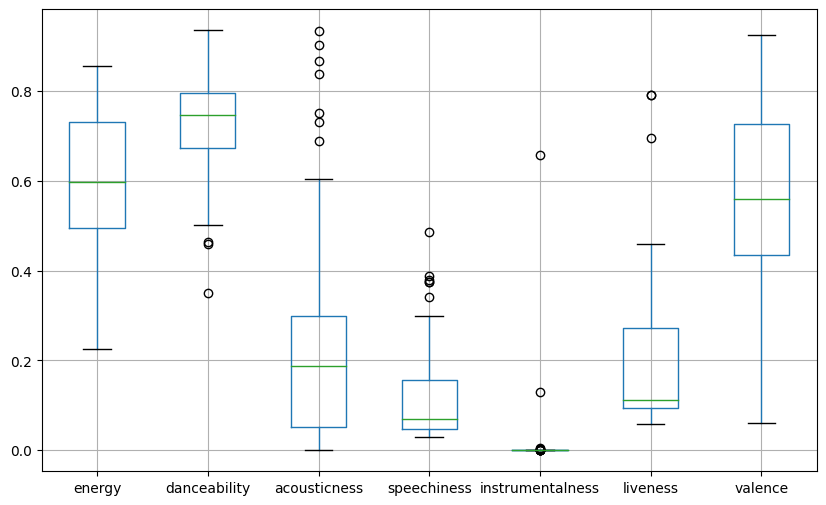

In [305]:
features = ['energy',
            'danceability',
            'acousticness',
            'speechiness',
            'instrumentalness',
            'liveness',
            'valence']

features_boxplot = spotify_data[features].boxplot(figsize=(10, 6))

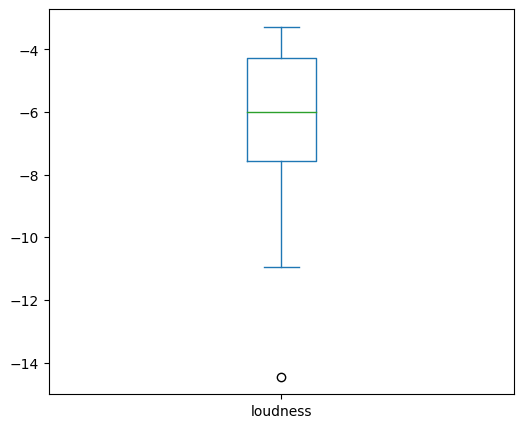

In [306]:
loudness_boxplot = spotify_data.loudness.plot.box(figsize=(6, 5))

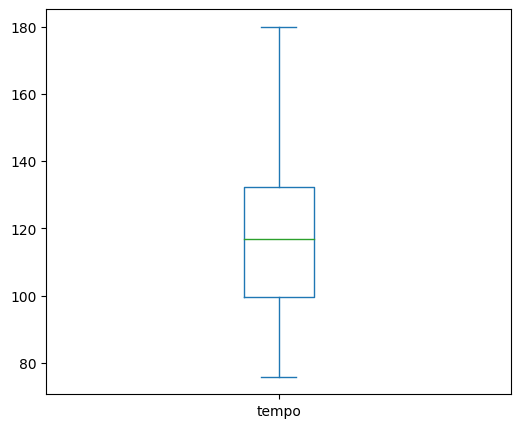

In [307]:
tempo_boxplot = spotify_data.tempo.plot.box(figsize=(6, 5))

<a id='observations_cell'></a>
*There are some fascinating potential observations here:*
*   There are quite a lot of outliers in the `acousticness` section (points above the 3rd quartile), indicating this is not really a homogeneous variable between the tracks. 
*   Same can be said for the `instrumentalness`, but only for 2 tracks that pop up way above the others. All other tracks populate around 0.
*   Most songs seem to high on the `danceability`, `energy` & `valence` metrics - potential sign for good variables to identify popular songs.
*   There is one very quiet song that is an outlier in the `variable` - other tracks seem to be quite loud.
*   We have a pretty wide spectrum of values for the `tempo` of the song.


## More Technical Analysis

Let's delve into the Feature Analysis a bit deeper, shall we? First, let's look at which metrics correlate (positively and negatively) with each other

In [308]:
numeric_variables = ['position',
      'energy',
      'danceability',
      'loudness',
      'acousticness',
      'speechiness',
      'instrumentalness',
      'liveness',
      'valence',
      'tempo',
      'duration_minutes']
correlation_matrix = spotify_data[numeric_variables].corr()
correlation_matrix

,position,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_minutes
position,1.000000,0.030381,-0.176321,0.034935,-0.036557,0.095790,-0.003126,-0.063216,-0.034159,0.081289,0.309557
energy,0.030381,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.080290
danceability,-0.176321,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.034681
loudness,0.034935,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.063487
acousticness,-0.036557,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.009499
speechiness,0.095790,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.367160
instrumentalness,-0.003126,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184308
liveness,-0.063216,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090190
valence,-0.034159,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.040805
tempo,0.081289,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.129765


Let's try and look at it with a more understandable view - a heatmap.

In [7]:
correlation_heatmap = sns.heatmap(correlation_matrix, annot=True)

NameError: name 'correlation_matrix' is not defined

##### Mentionable Correlations
*From this, it is quite clear that the correlations of note are:*
*   `energy` - `acousticness` *(very negative)*
*   `loudness` - `acousticness` *(very negative)*
*   `instrumentalness` - `energy` *(negative)*
*   `instrumentalness` - `loudness` *(quite negative)*
*   `loudness` - `energy` *(very positive)*
*   `valence` - `danceability` *(positive)*

Let's try to extract these high values (by filtering for abs values bigger than 0.5): 
<a id='observations_cell'></a>

In [310]:
correlation_matrix[((abs(correlation_matrix) >= 0.5)
                    & (correlation_matrix != 1))]

,position,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_minutes
position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,0.791640,-0.682479,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,0.791640,NaN,NaN,NaN,NaN,-0.553735,NaN,NaN,NaN,NaN
acousticness,NaN,-0.682479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,-0.553735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*There seems to be only one strong positive correlation between the feature variables, and that is between loudness and energy, with a Pearson correlation value of 0.791.
As for strongly negatively correlated, there are only two note-worthy correlations: energy and acousticness are strongly negatively correlated - the more acoustic a song is, the less energy it has; the same thing can be said for instrumentalness and loudness - the more likely that the track was instrument-based, the less likely the song is loud. (This can also be interpreted as a positive correlation between instrumentalness and quiteness of the track)*

However, which variables are not correlated?

In [311]:
correlation_matrix[(correlation_matrix > -0.15)
                   & (correlation_matrix < 0.15)]

# P-values are best to use for low correlations - code snippet in review.

,position,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_minutes
position,NaN,0.030381,NaN,0.034935,-0.036557,0.095790,-0.003126,-0.063216,-0.034159,0.081289,NaN
energy,0.030381,NaN,NaN,NaN,NaN,0.074267,NaN,0.069487,NaN,0.075191,0.080290
danceability,NaN,NaN,NaN,NaN,NaN,NaN,-0.017706,-0.006648,NaN,NaN,-0.034681
loudness,0.034935,NaN,NaN,NaN,NaN,-0.021693,NaN,-0.069939,NaN,0.102097,0.063487
acousticness,-0.036557,NaN,NaN,NaN,NaN,-0.135392,NaN,-0.128384,NaN,NaN,-0.009499
speechiness,0.095790,0.074267,NaN,-0.021693,-0.135392,NaN,0.028948,-0.142957,0.053867,NaN,NaN
instrumentalness,-0.003126,NaN,-0.017706,NaN,NaN,0.028948,NaN,-0.087034,NaN,0.018853,NaN
liveness,-0.063216,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,NaN,-0.033366,0.025457,-0.090190
valence,-0.034159,NaN,NaN,NaN,NaN,0.053867,NaN,-0.033366,NaN,0.045089,-0.040805
tempo,0.081289,0.075191,NaN,0.102097,NaN,NaN,0.018853,0.025457,0.045089,NaN,0.129765


*Whilst going through each observation would be interesting, I want to highlight that the `position` variable is almost uncorrelated with any other variable, except for a small positive correlation with `danceability`. This means that there is at least a small relationship between the fact that songs higher up in the list are more danceable.*

What about the danceability between main genres (along with other variables):

In [312]:
main_genres_statistics = spotify_data.groupby('main_genre')\
                            [numeric_variables]\
                            .agg(['count', 'mean'])
second_genres_statistics = spotify_data.groupby('second_genre')\
                            [numeric_variables]\
                            .agg(['count', 'mean'])

pd.concat([main_genres_statistics, second_genres_statistics], axis = 0)\
    .sort_values(by = ('energy', 'count'), ascending = False)

position            energy           danceability   
                       count       mean  count      mean        count   
Pop                       15  28.466667     15  0.598933           15  \
Hip-Hop                   14  23.500000     14  0.573429           14   
Rap                       13  23.153846     13  0.582615           13   
Alternative                5  21.400000      5  0.606600            5   
Dance                      5  30.200000      5  0.762000            5   
Electronic                 5  30.200000      5  0.762000            5   
Indie                      4  15.750000      4  0.551000            4   
R&B                        3   9.333333      3  0.611000            3   
Electro-pop                2  28.000000      2  0.475000            2   
Soul                       2   9.500000      2  0.701500            2   
Nu-disco                   1   5.000000      1  0.793000            1   
Pop rap                    1  24.000000      1  0.722000            1   
Chamber pop                1  45.000000      1  0.296000            1   
Disco                      1  32.000000      1  0.729000            1   
Dreampop                   1  38.000000      1  0.522000            1   
Hip-Hop                    1  38.000000      1  0.522000            1   
Hip-Hop alternative        1   9.000000      1  0.430000            1   
Disco-pop                  1  33.000000      1  0.765000            1   
Dance-pop                  1  32.000000      1  0.729000            1   
Soft Rock                  1  13.000000      1  0.762000            1   
Trap                       1  28.000000      1  0.454000            1   
reggaeton                  1  44.000000      1  0.829000            1   

                              loudness            acousticness             
                         mean    count       mean        count      mean   
Pop                  0.678733       15  -6.262800           15  0.315053  \
Hip-Hop              0.777643       14  -6.960071           14  0.176645   
Rap                  0.765538       13  -6.917846           13  0.188741   
Alternative          0.650800        5  -5.151600            5  0.468860   
Dance                0.755000        5  -5.338000            5  0.099440   
Electronic           0.755000        5  -5.338000            5  0.099440   
Indie                0.661750        4  -5.421000            4  0.583500   
R&B                  0.695000        3  -6.422333            3  0.126820   
Electro-pop          0.789500        2  -8.898500            2  0.255500   
Soul                 0.650500        2  -5.255500            2  0.128730   
Nu-disco             0.793000        1  -4.521000            1  0.012300   
Pop rap              0.700000        1  -3.558000            1  0.221000   
Chamber pop          0.351000        1 -10.109000            1  0.934000   
Disco                0.730000        1  -3.434000            1  0.167000   
Dreampop             0.755000        1  -4.368000            1  0.533000   
Hip-Hop              0.755000        1  -4.368000            1  0.533000   
Hip-Hop alternative  0.784000        1  -8.756000            1  0.123000   
Disco-pop            0.746000        1  -4.410000            1  0.011200   
Dance-pop            0.730000        1  -3.434000            1  0.167000   
Soft Rock            0.695000        1  -3.497000            1  0.192000   
Trap                 0.935000        1  -7.509000            1  0.019400   
reggaeton            0.607000        1  -4.074000            1  0.010300   

                    speechiness           instrumentalness                 
                          count      mean            count          mean   
Pop                          15  0.108347               15  4.404637e-02  \
Hip-Hop                      14  0.170571               14  6.335714e-07   
Rap                          13  0.154846               13  6.823077e-07   
Alternative                   5  0.123700                5  7.

<a id='per_genre_observations'></a>
#### Observations
*Some values to point out:*
*   There is not that much variance in the `energy` variable - only `chamber-pop` seems to have significantly lower energy compared to other genres, that average around 0.5 - 0.7.
*   `Danceability` has two standouts - `Trap` (with a `danceability` of 0.935) & `Chamber-pop` (with a `danceability` of 0.351) on both sides of the spectrum. Although, each of these genres have only 1 song in the top 50 list. So maybe should not be read into as much. It does seem that majority of genres peter out at ~0.7, which could be thought of as an indicator that songs, at least according to this list, have to be at least 0.6 in the `danceability` department.
*   There is a lot of variability in `loudness` between all genres. However, the genres that have the highest amount of tracks in the top 50 (`Rap`, `Pop` & `Hip-Hop`) all average out at around 6.2-6.9. Although, we should take into account that stylistcally, these three genres have a lot in common.
*   The `acousticness` metric is dominated by the `Indie`, `Alternative`, `Chamber-Pop` & `Dream-Pop` genres, which stylistically have more acoustic instruments performances (e.g. Piano, Classical Guitar)
*   Almost all genres have `instrumentalness` as 0, which indicates that all popular songs have to have vocals. 
*   The `liveness` value is quite low for all genres. This reflects reality since most songs that go wildly popular are studio-recorded albums or singles rather than in the presence of a live audience. This is done to provide the best possible audio quality for the song/artist to shine.
*   Interestingly, the `valence` value for all genres is quite high - 14 out of 21 unique genres have positive average `valences`. This indicates that for a song to be very popular, it ***mostly*** has to be positive, rather than negative, which means a value of more than 0.50. At least according to the 2020 Spotify Top 50 Track list. 
*   As for the `tempo` value, most genres, atleast a tempo of 100 beats/minute, barring some exceptions, e.g.`Dreampop`, `Pop Rap`, `Reggaeton`, which all have 1 song in each genre. Based on the fact that we have 37 songs that have a tempo of at least 100 out of the 50 and 11 out of the top 15 songs in the 100 beats/minute club, we could interpolate, that for a song to be popular it ***mostly*** has to be above 100 beats/minute. But not necessarily that faster songs perform better, in general (since there are exceptions to this as shown below). 
*****
P.s.: The top 10 songs' features are displayed above for further context

In [313]:
print("The top 10 songs features: ")
spotify_data[numeric_variables].head(15)

The top 10 songs features: 


,position,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_minutes
Position,,,,,,,,,,,
0,1,0.730,0.514,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,3.33
1,2,0.593,0.825,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,3.50
2,3,0.586,0.896,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,3.28
3,4,0.721,0.785,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,2.94
4,5,0.793,0.793,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,3.05
5,6,0.690,0.746,-7.956,0.24700,0.1640,0.000000,0.1010,0.497,89.977,3.03
6,7,0.816,0.548,-4.209,0.12200,0.0465,0.000000,0.3350,0.557,95.390,2.90
7,8,0.431,0.726,-8.765,0.73100,0.1350,0.000000,0.6960,0.348,144.026,2.89
8,9,0.430,0.784,-8.756,0.12300,0.0364,0.000000,0.0887,0.236,127.087,2.66


Now, that we have identified that `danceability`, `valence` & `tempo` ( + `energy` & `duration_minutes` from the [Mentionable Correlations](#observations_cell)) are somewhat good predictors on whether a song is going to be popular, let's look at which songs have these indicators and their positions in the final ranking.

In [314]:
popular_songs_metrics = (spotify_data.danceability > 0.6)\
                            & (spotify_data.valence > 0.5)\
                            & (spotify_data.tempo > 100)\
                            & ((spotify_data.duration_minutes > short_cut_off)\
                            & (spotify_data.duration_minutes < long_cut_off))
print(f"""There are {spotify_data[popular_songs_metrics]
                     .track_id
                     .count()} tracks that match this description:""")
spotify_data[popular_songs_metrics][identifying_columns]

There are 14 tracks that match this description:


,artist,album,track_name,feature,main_genre
Position,,,,,
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,NaN,Hip-Hop
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,NaN,Dance
4,Dua Lipa,Future Nostalgia,Don't Start Now,NaN,Nu-disco
10,KAROL G,Tusa,Tusa,NaN,Pop
12,Post Malone,Hollywood's Bleeding,Circles,NaN,Pop
14,Justin Bieber,Changes,Intentions (feat. Quavo),Quavo,Pop
25,Shawn Mendes,Shawn Mendes (Deluxe),Señorita,NaN,Pop
26,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,NaN,Electro-pop
29,Eminem,Music To Be Murdered By,Godzilla (feat. Juice WRLD),Juice WRLD,Hip-Hop


*Whilst these filters are not the best at identifying the most popular songs (we only got 14 out of the 50 songs in the track list & 6 out of the top 15 tracks), I think it reflects two things: the generalizaton of these metrics and their inability to portray what certain features the track has (e.g. what if it's a new song - released in November 2020? - it might not have had enough time to reach the amount of streams needed to crack the top 50, but it would be wildly popular towards the end of the year (a momentum metric)) & the somewhat difficult nature of the study object. By the latter, I mean that we are studying art with numbers, which is not the easiest to do and since art is more about emotion, feel and relatability, it is difficult to quantify what songs may be hits and which are duds.*

*****
## Further analysis - what can be improved? 
*   We need a bit more metrics per track: 
    *   One of them I already presented - the `momentum` metric.
    *   The `composition` of a song - what is the ramp up to the song (was it a slow-burner or right in your face from the start?), how many drops did it have?
    *   The `relatability/contemporarity` of the song - does it talk about current issues/topics people can relate to? (e.g. for the American audience - Alright by Kendrick Lamar and it's relatedness with the BLM movement)
    *   The `award` boolean variable - whether the song has won any awards (e.g. Grammy)
    *   In a similar sence, the `featured_in_movie` metric - was the song coming from/was a collaboration for a movie. (e.g. the "Spiderman Across the Spiderverse" had a special album created for it)
    *   The `average_critics_review` metric, which would feature the average score that prominent critics gave the track.